# 1.Introduction to SVM

Use svm to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) ormaligant ( evil state).

SVM works by mapping data to a high-dimensionalfeature space so that data points can be categorized,even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A seperator between the categories is found,then the data is transformed in such a waythat the seperator could be drawn as a hyperplane.

#  2.Necessary imports

In [1]:
import pandas as pd
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os


#  3.About the Cancer data

Original Author - UCI Machine Learning Repository (Asuncion and Newman,2007)
[http://mlearn.ics.uci.edu/MLRepository.html]

Public Source - https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

Each record contains the values of a set of cell characteristics. The fields in each records are:

|Field name|Description|
|--- |--- |
|ID|Identifier|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland Chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class| Benign or maligant|

In this example, we are using a dataset that has a 10 predictors (columns) in each record,700 records(rows).

#### row = record
#### column = attribute / dimension
#### target = prediction


In [2]:
#  4. Load Data From CSV File 

In [19]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()


2    458
4    241
Name: Class, dtype: int64

#  5. Distribution of the classes

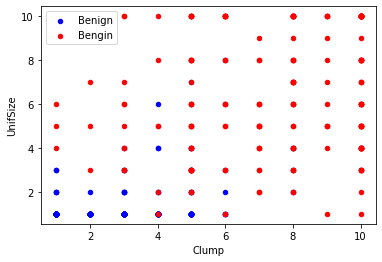

In [22]:
cell_df = pd.read_csv('cell_samples.csv')
Benign_df = cell_df[cell_df['Class']==2][0:200]
maligant_df = cell_df[cell_df['Class']==4][0:200]

axes = Benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')

maligant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Bengin',ax=axes)
 #help(benign_df.plot)

#  6. Selection of unwanted columns

In [5]:
cell_df.dtypes

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes
 

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# 7.Remove unwanted columns

In [6]:
cell_df.columns

feature_df = cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# cell_df 100 rows and 11 columns
# picked 9 columns out oh 11

#Independant var
x = np.asarray(feature_df)

# Independant variable
y = np.asarray(cell_df['Class'])

y[0:5]


array([2, 2, 2, 2, 2], dtype=int64)

# 8. Divide the data as Train/Test dataset

In [26]:
'''
cell_df (100)---> Train (80 rows) / Test (20 rows)

Train(x,y) ## x itself is a 2D array. ## y is 1D
Test(x,y)
'''

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=4)

# 546 x 9
x_train.shape

#546 x 1
y_train.shape

# 137 x 9
x_test.shape

# 137 x 1
y_test.shape

(137,)

# 9. Modeling (SVM with Scikit-learn)

The SVM algoritham offers a choice of kernel function for performing its processing.Basically, mapping data into a higher dimentional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

     1.Linear
     2.Polynomial
     3.Radial basis function (RBF)
     Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different function in turn and compare the results. Let's just use the default, RBF(Radial Basis Function) for this lab.


In [28]:
from sklearn import svm

'''
Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
 |
 |   Current default is 'auto' which uses (1 / n_features)
 |   if gamma= 'scale' is passed then it uses 1 / (n_features * x.var())
 |   as value of gamma.
'''

classifier = svm.SVC(kernel = 'linear', gamma='auto',C=2)
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 10. Evaluation(Results)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

